In [18]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np                       # pour les numpy array
import matplotlib.pyplot as plt          # librairie graphique
from scipy.integrate import odeint       # seulement odeint

# 1. Un modèle logistique avec la capacité d'accueil du milieu dépendant du temps

On rappelle que le modèle logistique s'écrit
\begin{equation*} N'(t) = r \; N(t) \Bigl( 1 - \frac{N(t)}{K} \Bigr),
\label{logistique} \tag{1}
\end{equation*}
où $r$ et $K$ sont deux constantes strictement positives : $r$ est le taux de croissance (naissance - mort) et $K$ est la capacité du milieu. La solution du problème de Cauchy pour l'équation logistique associé à la donnée initiale $ N( 0 ) = N_0 $ est 
$$
N(t) = \frac{K}{1 + \bigl(\frac{K}{N_0}-1\bigr) \text{e}^{-rt}}, \qquad t\geq0. \tag{2}
$$

Il est peu réaliste de supposer que dans un modèle décrivant la dynamique d’une population humaine la capacité d’accueil du milieu reste toujours constante. On va considérer un modèle où la capacité de milieu est affectée par des changements technologiques.
On va supposer que de nouvelles technologies augmentent l’efficacité de consommation de ressources et que elles ne se propagent pas instantanément, mais sont plutôt adoptées à un rythme variable.
Ces processus d'adoption sont souvent bien modélisés par une courbe logistique. Premièrement, le taux de l'adoption est lente, car une nouvelle technologie a des difficultés pour remplacer une technologie existante. Ensuite, le taux d'adoption augmente, généralement de façon exponentielle jusqu'à ce que les limites physiques ralentissent l'adoption. 

Nous allons modéliser la taille de la population avec une fonction $ N $ qui satisfait le problème de Cauchy:
$$ N'(t) = r_N \; N(t) \Bigl( 1 - \frac{N(t)}{C(t)} \Bigr), \quad N( 0 ) = N_0 \tag{3}$$
avec $ C $, la capacité d'accueil du milieu, solution du problème suivant:
$$C'(t) =r ( C - K_* ) \Bigl( 1 - \frac{ C - K_* }{ K } \Bigr), \quad C( t_{fl} ) = K_0 + K_*, \tag{4} $$
où $ r, K_*, K, t_{fl}, K_0 $ sont des paramètres réels.



**EXERCICE 1**
> 1. Montrer que si $ \tilde K $ est solution de l'équation logistique (1)  vérifiant $ \tilde K( t_{fl} ) = K_0 $, alors $ C = \tilde K + K_* $ est solution de (4).
> 2. Montrer que si $ P $ est solution de (1) vérifiant $ P( 0 ) = K_0 $, alors la fonction $ \tilde K $ définie par $ \tilde K( t ) = P( t - t_{fl} ) $ est solution de (1) vérifiant $ \tilde K( t_{fl} ) = K_0 $.
> 3. En utilisant l'expression (2) de la solution exacte de l'équation (1) et le résultat des questions 1-2, montrer que la solution exacte de (4) est donnée par la formule
$$
C( t ) = K_* + \frac{K} {( 1 + ( K / K_0 - 1 ) * e^{ - r ( t - t_{fl} ) )}}.
$$

On prend les valeurs suivantes des paramètres: $K= 50$, $K_*=50$, $r = 0.1$, $ t_{fl} = 30 $, $ K_0 = 1 $. 
> 4. Tracer la courbe de $ C $ sur l'intervalle de temps $ [0, T] $ avec $ T = 130 $. Ajouter les lignes horizontales $ C = K_* $, $ C = K + K_* $ et un marqueur au point $ (t_{fl}, K_0+K_*) $, ajouter une légende. En utilisant la figure proposer une interprétation des paramètres $ K $, $ K_* $, $ r $, $ t_{fl} $, $ K_0 $.

Pour la suite on prend les valeurs des paramètres $T=130$, $ N_0 = 10 $, $r_N = 0.2$.
> 5. Construire la solution approchée du problème (3) à l'aide de la fonction `odeint` et la tracer (avec des marqueurs). 
> 6. Superposer la courbe de la fonction $t\mapsto C(t)$. Que remarquez-vous ?
> 7. Faire varier la valeur du paramètre $ N_0 $ et commentez les résultats obtenus.

**Réponse à la question 1 :**

Soit $\tilde K$ la solution de l'équation logistique (1). Alors :

\begin{equation*}   \tilde K ( t ) = \frac{K}{1 + \bigl(\frac{K}{\tilde K_0}-1\bigr) \text{e}^{-rt}}, \qquad t\geq0
\end{equation*}       

Or on sait que $ \tilde K (t_{fl}) = K_0 $ 

Alors $ C = \tilde K + K_* $ est solution de (4) car:
        $$ C(t_{fl}) = \tilde K(t_{fl}) + K_*   \\  = K_0 + K_*$$  
qui est la solution donnée dans la consigne.

**Réponse à la question 2 :**

Soit $P$ la solution de l'équation logistique (1) tel que $P(0) = K_0$. Alors :

\begin{equation*}  
P (t) = \frac{K}{1 + \bigl(\frac{K}{K_0}-1\bigr) \text{e}^{-rt}}, \qquad t\geq0
\end{equation*}       

Soit $ \tilde K (t) = P(t - t_{fl}) $. On a donc: 
\begin{equation*}
\tilde K (t_{fl}) = P(t_{fl} - t_{fl})\\ K (t_{fl}) = P(0) 
\\ \tilde K (t_{fl})= K_0 
\end{equation*}


Alors:
\begin{equation*}   P(t - t_{fl}) = \frac{K}{1 + \bigl(\frac{K}{K_0}-1\bigr) \text{e}^{-r(t-t_{fl})}}, \qquad t\geq0
                  \\\tilde K (t) = \frac{K}{1 + \bigl(\frac{K}{\tilde K (t_{fl})}-1\bigr) \text{e}^{-r(t-t_{fl})}}, \qquad t\geq0
\end{equation*}   

Donc $\tilde K$ la solution de l'équation logistique (1) d'après la consigne.

**Réponse à la question 3 :**

D'après la **Réponse à la question 1 :** et la **Réponse à la question 2 :**, on a que la foction $ \tilde K$ définit tel que :

\begin{equation*}
\tilde K (t) = P(t - t_{fl}), \\ avec \qquad P (t) = \frac{K}{1 + \bigl(\frac{K}{K_0}-1\bigr) \text{e}^{-rt}}, \qquad t\geq0
\end{equation*}  

Alors $ \tilde K $ deffinit la solution de (4) avec:

\begin{equation*}
C(t_{fl}) = \tilde K(t_{fl}) + K_* , \qquad t\geq0
\\C(t_{fl}) = \frac{K}{1 + \bigl(\frac{K}{K_0}-1\bigr) \text{e}^{-r(t-t_{fl})}} + K_* , \qquad t\geq0
\end{equation*}

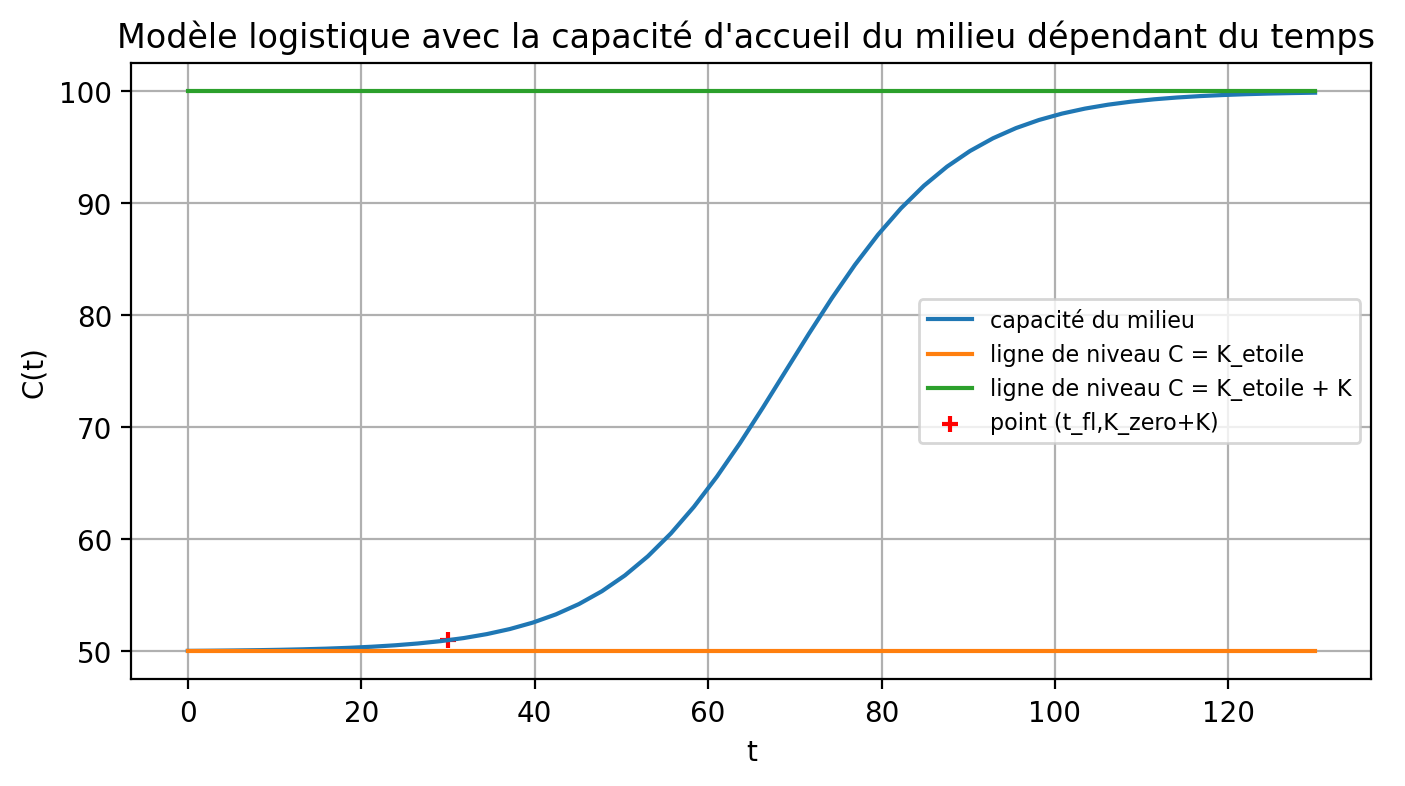

In [19]:
def C(t,K,K_etoile,K_zero,r,t_fl):
    """On définit la fonction C capacité du porblème de Cauchy"""
    return K/(1+((K/K_zero)-1)*np.exp(-r*(t-t_fl))) + K_etoile

# Paramètres
K=50
K_etoile=50
K_zero = 1
r=0.1
t_fl=30

T = 130  # On fixe la valeur de temps final
t = np.linspace(0,T)  # On créer un tableau avec toutes les valeurs de temps t 

# On va tracer la courbe de C sur l'intervalle de temps  [0,T] avec T=130
fig = plt.figure(figsize = (8,4))
ax = fig.add_subplot(1,1,1)
ax.grid(True)
ax.plot(t,C(t,K,K_etoile,K_zero,r,t_fl),label = 'capacité du milieu')
ax.plot(t,np.ones(len(t))*K_etoile,label ='ligne de niveau C = K_etoile')
ax.plot(t,np.ones(len(t))*(K_etoile+K),label ='ligne de niveau C = K_etoile + K')
ax.scatter(t_fl,(K_zero+K),marker = '+',label = 'point (t_fl,K_zero+K)',color ='r')
ax.set_xlabel('t')
ax.set_ylabel('C(t)')
ax.set_title('Modèle logistique avec la capacité d\'accueil du milieu dépendant du temps ')
ax.legend(fontsize = 8)
plt.show()

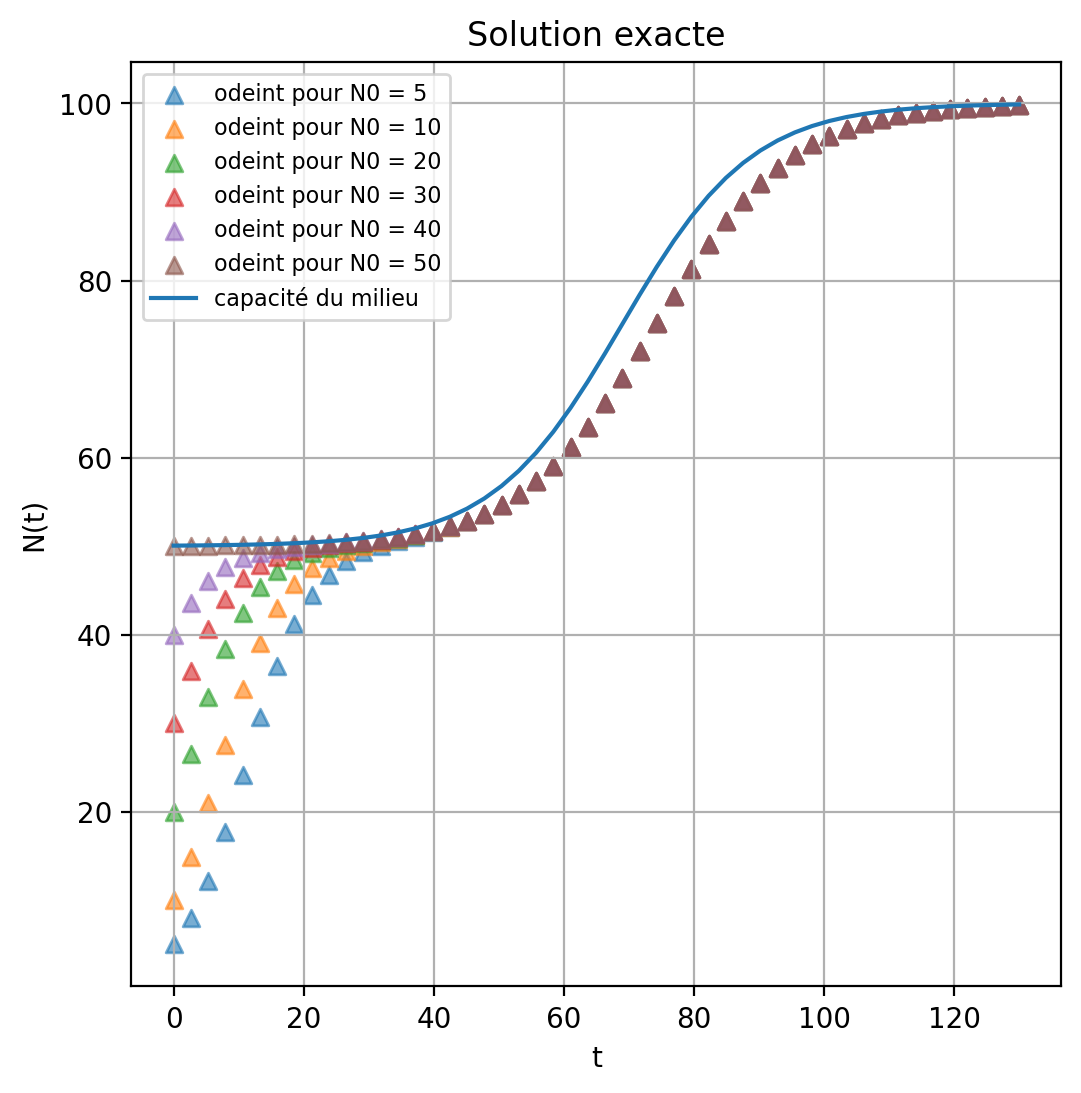

In [20]:
# Paramètres 
liste_N0 = [5,10,20,30,40,50]  # On prend une liste de différentes valeurs de N0 
rN=0.2
T = 130 
t = np.linspace(0,T)

def f(y, t):
    """fonction qui définit l'équation différentielle (3)"""
    return rN*y*(1-y/C(t,K,K_etoile,K_zero,r,t_fl))

# On trace le graphique des solutions de l'équation différentielle (3)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)

for n,N0 in enumerate(liste_N0):
    """on fait varier les valeurs de N0 et on trace la solution odeint associé"""
    solution_odeint = odeint(f, N0, t)
    ax.scatter(t,solution_odeint, label=f'odeint pour N0 = {N0}', marker='^', alpha = 0.6)

ax.plot(t,C(t,K,K_etoile,K_zero,r,t_fl),label = 'capacité du milieu')
ax.set_xlabel('t')
ax.set_ylabel('N(t)')
ax.legend(fontsize = 8)
ax.set_title("Solution exacte")
plt.show()

**Réponse à la question 6 et 7 :**

**6)**
On remarque que quand t tend vers T alors la solution exacte se rapproche de la courbe C de la question 4).

**7)**
On remarque que plus N0 est grand plus la solution excate est proche de la courbe C de la question 4).

# 2. L'impact de la pêche dans le modèle Lotka-Volterra


L'objectif de cette partie est d'étudier numériquement l'impact de la peche dans le modèle de Lotka-Volterra et d'illustrer le paradoxe observé par d'Anconna (voir la fiche de cours n°1).

On se donne donc deux populations $H(t)$ de sardines (les proies) et $P(t)$ de requins (les prédateurs) au temps $t,$ dont l'évolution au cours du temps suit la loi:

\begin{equation*}
     \begin{cases}
        H'(t)&=H(t)( a-p-bP(t)),\\
        P'(t)&=P(t)( -c -p +dH(t)).
     \end{cases}
\end{equation*}

où $a,b,c,d,p >0$. Le coefficient $a$ représente le taux de reproduction des sardines en l'abscence de requins, $c$ le taux de mortalité en l'abscence de sardines, $b$ le taux de mortalités des sardines mangés par les requins et $d$ le taux de reproduction des requins en fonction de la quantité de sardines mangées. Nous pêchons une même proportion $p$ de requins et de sardines ce qui se traduit par l'ajout de deux termes négatifs $-pH(t)$ et $-pP(t)$ dans les équations du modèle Lotka-Volterra.

On suppose connues les populations de sardines et de requins à l'instant initial $t_0=0$ :

\begin{equation*}
     \begin{cases}
    H(0) = H_0, \\
    P(0) = P_0,
     \end{cases}
\end{equation*}
où $H_0\ge 0$ et $P_0\ge 0$ sont donnés.

Pour toutes les applications numériques, on choisit : $a=0.1$, $b=d=6\cdot 10^{-5},$ $c=0.05$. On choisit une population initiale de $H_0=1500$ sardines et $P_0=500$ requins.

**EXERCICE 2**

> 1. Reprenez chacune des questions des Exercices 1-3 du TP02 pour ce modèle. Visualisez la solution pour les valeurs de p  de la liste $ [0, 0.02, 0.04, 0.06] $. On pourra tracer le champs de vecteurs pour $ p = 0 $ uniquement.
> 2. Expliquez quel est l'impact de la pêche sur l'évolution des populations. Ce modèle permet-il d'expliquer les observations de d'Anconna sur la peche de la sardine dans la mer Adriatique (voir le cours)? Justifiez votre réponse.
> 3. Quelle espèce est favorisée par la pêche? 

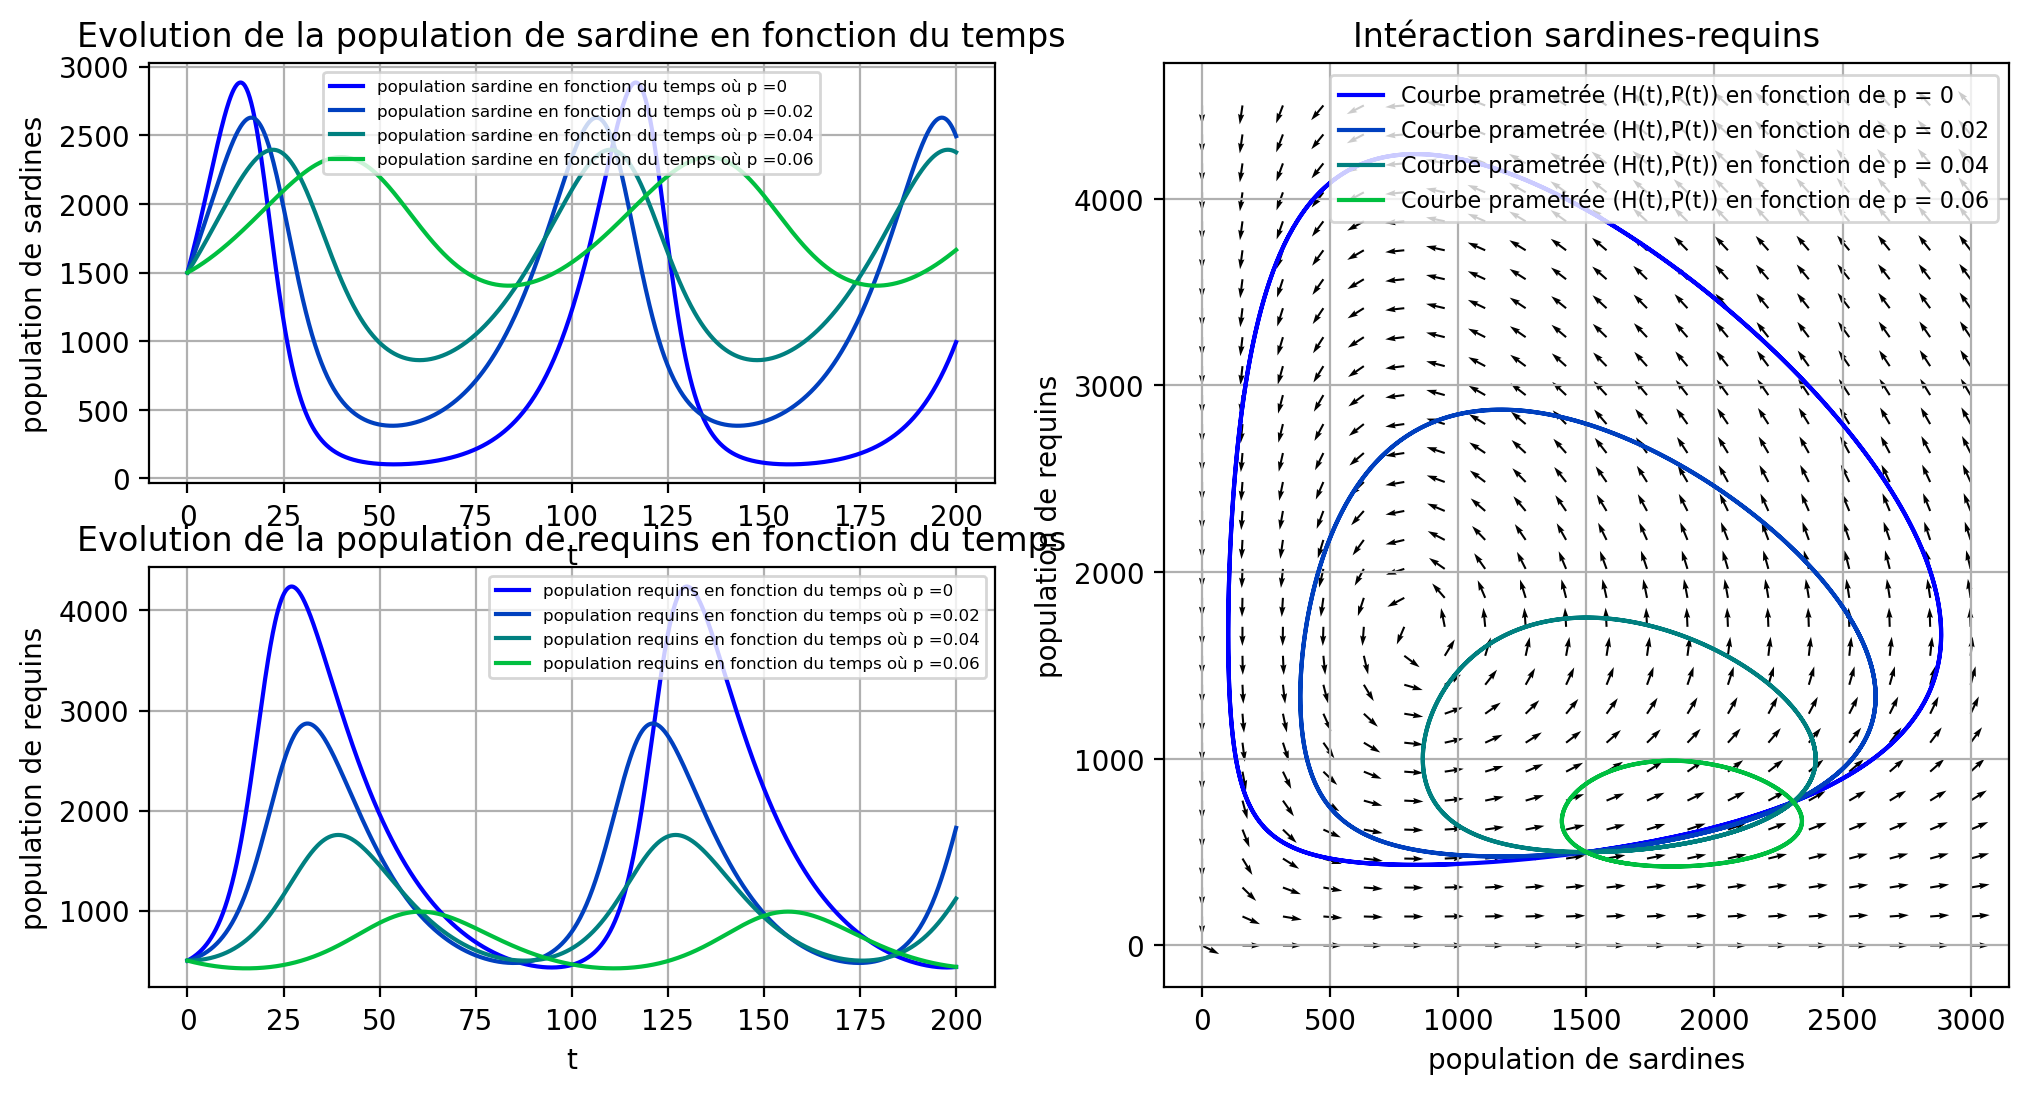

In [21]:
# parameters
a, b, c, d = 0.1, 6*pow(10,-5), 0.05, 6*pow(10,-5)
T, N = 200, 1000
H0, P0 = 1500, 500

def F1 (x,y,a,b,p):
    """fonction second membre pour les sardines"""
    return x*(a-p-b*y)

def F2 (x,y,c,d,p):
    """fonction second membre pour les requins"""
    return y*(-c-p+d*x)
        
def F(X, t, a, b, c, d, p):
    """fonction second membre pour le système"""
    x, y = X
    return np.array([F1(x,y,a,b,p),F2(x,y,c,d,p)])

t = np.linspace(0, T, N+1)

sardines, requins = np.meshgrid(
    np.linspace(0.1, 3000, 20),
    np.linspace(0.1, 4500, 30)
)
fsardines = F(( sardines, requins ),t, a, b, c, d, 0)[ 0 ]
frequins = F((sardines, requins),t, a, b, c, d, 0)[ 1 ]
n_sndmb = np.sqrt(fsardines**2 + frequins**2)  


fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 2) # subplot pour le champ de vecteurs et le graphe sardines vs requins
ax.quiver(sardines, requins, fsardines/n_sndmb, frequins/n_sndmb)  #champs de vecteurs pur p = 0
ax.grid(True)
axr = fig.add_subplot(2, 2, 1) # subplot pour le graphe du nombre de sardines en fonction du temps
axr.grid(True)
axs = fig.add_subplot(2, 2, 3) # subplot pour le graphe du nombre de requins en fonction du temps
axs.grid(True)

list_p = [0, 0.02, 0.04, 0.06]
for k, pk in enumerate(list_p):
    couleur = (0, k/len(list_p), 1-k/len(list_p))
    X = odeint(F,np.array([H0,P0]),t,args=(a,b,c,d,pk))
    
    # Tracer la courbe parametrée (H(t),P(t))
    ax.plot(X[:,0],X[:,1],label =(f'Courbe prametrée (H(t),P(t)) en fonction de p = {pk}'),color=couleur)
    ax.set_xlabel('population de sardines')
    ax.set_ylabel('population de requins')
    ax.set_title('Intéraction sardines-requins')
    ax.legend(fontsize=8)
    
    # Tracer H en fonction du temps
    axr.plot(t,X[:,0],label =(f'population sardine en fonction du temps où p ={pk}'),color=couleur)
    axr.set_xlabel('t')
    axr.set_ylabel('population de sardines')
    axr.set_title('Evolution de la population de sardine en fonction du temps')
    axr.legend(fontsize=6)
    
    # Tracer P enfonction du temps
    axs.plot(t,X[:,1],label =(f'population requins en fonction du temps où p ={pk}'),color=couleur)
    axs.set_xlabel('t')
    axs.set_ylabel('population de requins')
    axs.set_title('Evolution de la population de requins en fonction du temps')
    axs.legend(fontsize=6)   
    
plt.show()

**Réponse à la question 2 :**

On constate que la pêche a pour impacte de limiter les interactions entre les populations de sardines et les populations de requins. On voit par exemple dans le graphique en bas à gauche que les populations de requins sont plus petites quand la pêche est importante ce qui entraine un meilleur contrôle sur les populations de sardines. En effets on s’aperçoit que les populations de sardines ont des piques de populations plus faibles quand il y a des la pêche cependant il y a de moins importantes chutes de population aussi ce qui assure une plus grande stabilité des populations de sardines.

**Réponse à la question 3 :**

On s’aperçoit assez facilement que ce sont les sardines qui sont favorisées par la pêche car leurs populations de chutent que très peu.

# 3. Schéma de Crank-Nicolson

Le *schéma de Crank-Nicolson* consiste à construire la suite $ y^n $ des valeurs approchées de $ y( t^n ) $, $ n = 0, 1, \ldots, N $, via les relations suivantes:

\begin{equation*}
\left\lbrace
\begin{aligned}
& y^{ n+1 } = y^n + \frac{\Delta t}{ 2 }\left( f( t_{ n }, y^{ n } ) + f( t_{ n+1 }, y^{ n+1 } )
\right), \quad n = 0, 1, 2, \ldots, N-1, \\
& y^0 = y_0.
\end{aligned}
\right.
\end{equation*}


**EXERCICE 3**
> 1. Le schéma de Crank-Nicolson est-il explicite ou implicite? Justifiez votre réponse. 
> 2. Pour la fonction $ f $ définie par $ f( t, y ) = r y $ écrivez la relation qui donne $y^{n+1}$ en fonction de $y^n$ pour le schéma de Crank-Nicolson.
> 3. Programmez la méthode *crank_nicolson* afin de calculer la solution approchée du problème de Cauchy du modèle de Malthus. On écrira une fonction `crank_nicolson` qui prend en argument un nombre `y0` (la valeur initiale de la concentration), un nombre `T` (la longueur de l'intervalle de temps), un nombre $ N $ (le nombre de points) et un nombre `r` (le taux de croissance dans le modèle de Malthus), et qui retourne deux tableaux : `t`, constitué des instants $ 0, \Delta t, 2 \Delta t, \ldots, N \Delta t $, avec $ \Delta t = T / N $, et `y`, constitué des valeurs de la solution approchée en ces instants. On étudiera le modèle de Malthus avec $ r = -4 $ et on prendra $ y_0 = 1 $, $ T = 16 $.
> 4. Pour la méthode d'Euler explicite et pour le schéma de Crank-Nicolson, tracez sur un même graphique, la solution exacte et les solutions approchées du modèle de Malthus pour les valeurs $ N = 31, 32, 33, 34$. 
Commentez le graphique obtenu. Pour trouver une solution approchée du modèle de Malthus étudié quelle méthode numérique choisiriez-vous ? Expliquez votre choix. 
> 5. Pour l'équation de Malthus, calculez et affichez les erreurs globales du schéma de Crank-Nicolson pour différentes valeurs de $\Delta t$. Estimez l'ordre de convergence du schéma de Crank-Nicolson pour l'équation de Malthus. L'ordre de convergence du schéma de Crank-Nicolson est-il plus elevé que l'ordre de convergence du schéma d'Euler implicite?

**Réponse à la question 1 :**

Le schéma de Crank-Nicolson est implicite car il consiste en la résolution d'une équation correspondant au second membre d'une équation différentielle de type méthode d'Euler.

**Réponse à la question 2:**

Soit $f(t,y) = ry$ alors on peut, d'après le schéma de Crank_Nicolson, écrire : 

\begin{equation*}
\left\lbrace
\begin{aligned}
& y^{ n+1 } = y^n + \frac{\Delta t}{ 2 }\left( ry^n + ry^{n+1} 
\right), \quad n = 0, 1, 2, \ldots, N-1, \\
& y^0 = y_0
\end{aligned}
\right.
\\
\left\lbrace
\begin{aligned}
& y^{ n+1 } = y^n(\frac{{2+r\Delta t}}{2-r\Delta t}), \quad n = 0, 1, 2, \ldots, N-1, \\
& y^0 = y_0.
\end{aligned}
\right.
\end{equation*}

In [22]:
def crank_nicolson(y0, T, N, r):
    """
    schéma de Crank-Nicolson pour le modèle de Malthus 
    
    Parameters
    ----------
    
    y0: float
        donnée initiale
    T: float
        instant final
    N: int
        nombre de pas de temps
    r: float
       taux de croissance dans le modèle de Malthus

    Returns
    -------
    
    t: ndarray
        les instants où la solution approchée est calculée
    y: ndarray
        les valeurs de la solution approchée par le theta-schema
    """

    t = np.zeros(N+1)
    y = np.zeros(N+1)
    delta_t = T / N
    tk, yk = 0, y0
    y[0] = yk
    for k in range(N):
        yk = yk *((2+r*delta_t)/(2-r*delta_t))
        tk += delta_t
        t[k+1] = tk
        y[k+1] = yk
    return t, y

In [23]:
def euler(f, y0, T, N, *args):
    """
    méthode d'Euler explicite pour la résolution d'un problème de Cauchy
    
    Parameters
    ----------
    
    f: function
        la fonction qui définit le problème de Cauchy y'=f(t, y)
    y_0: float
        la valeur initiale de la solution à t=0
    T: float
        le temps final pour le calcul de la solution
    N: int
        le nombre de pas de temps
    *args:
        autres arguments optionnels
        
    Return
    ------
    
    t: ndarray
        les instants où la solution approchée est calculée
    y: ndarray
        les valeurs de la solution approchée
    """
    t = np.zeros(N+1)
    y = np.zeros(N+1)
    delta_t = T / N
    tk, yk = 0, y0
    y[0] = yk
    for k in range(N):
        yk += delta_t * f(tk, yk, *args)
        tk += delta_t
        t[k+1] = tk
        y[k+1] = yk
    return t, y

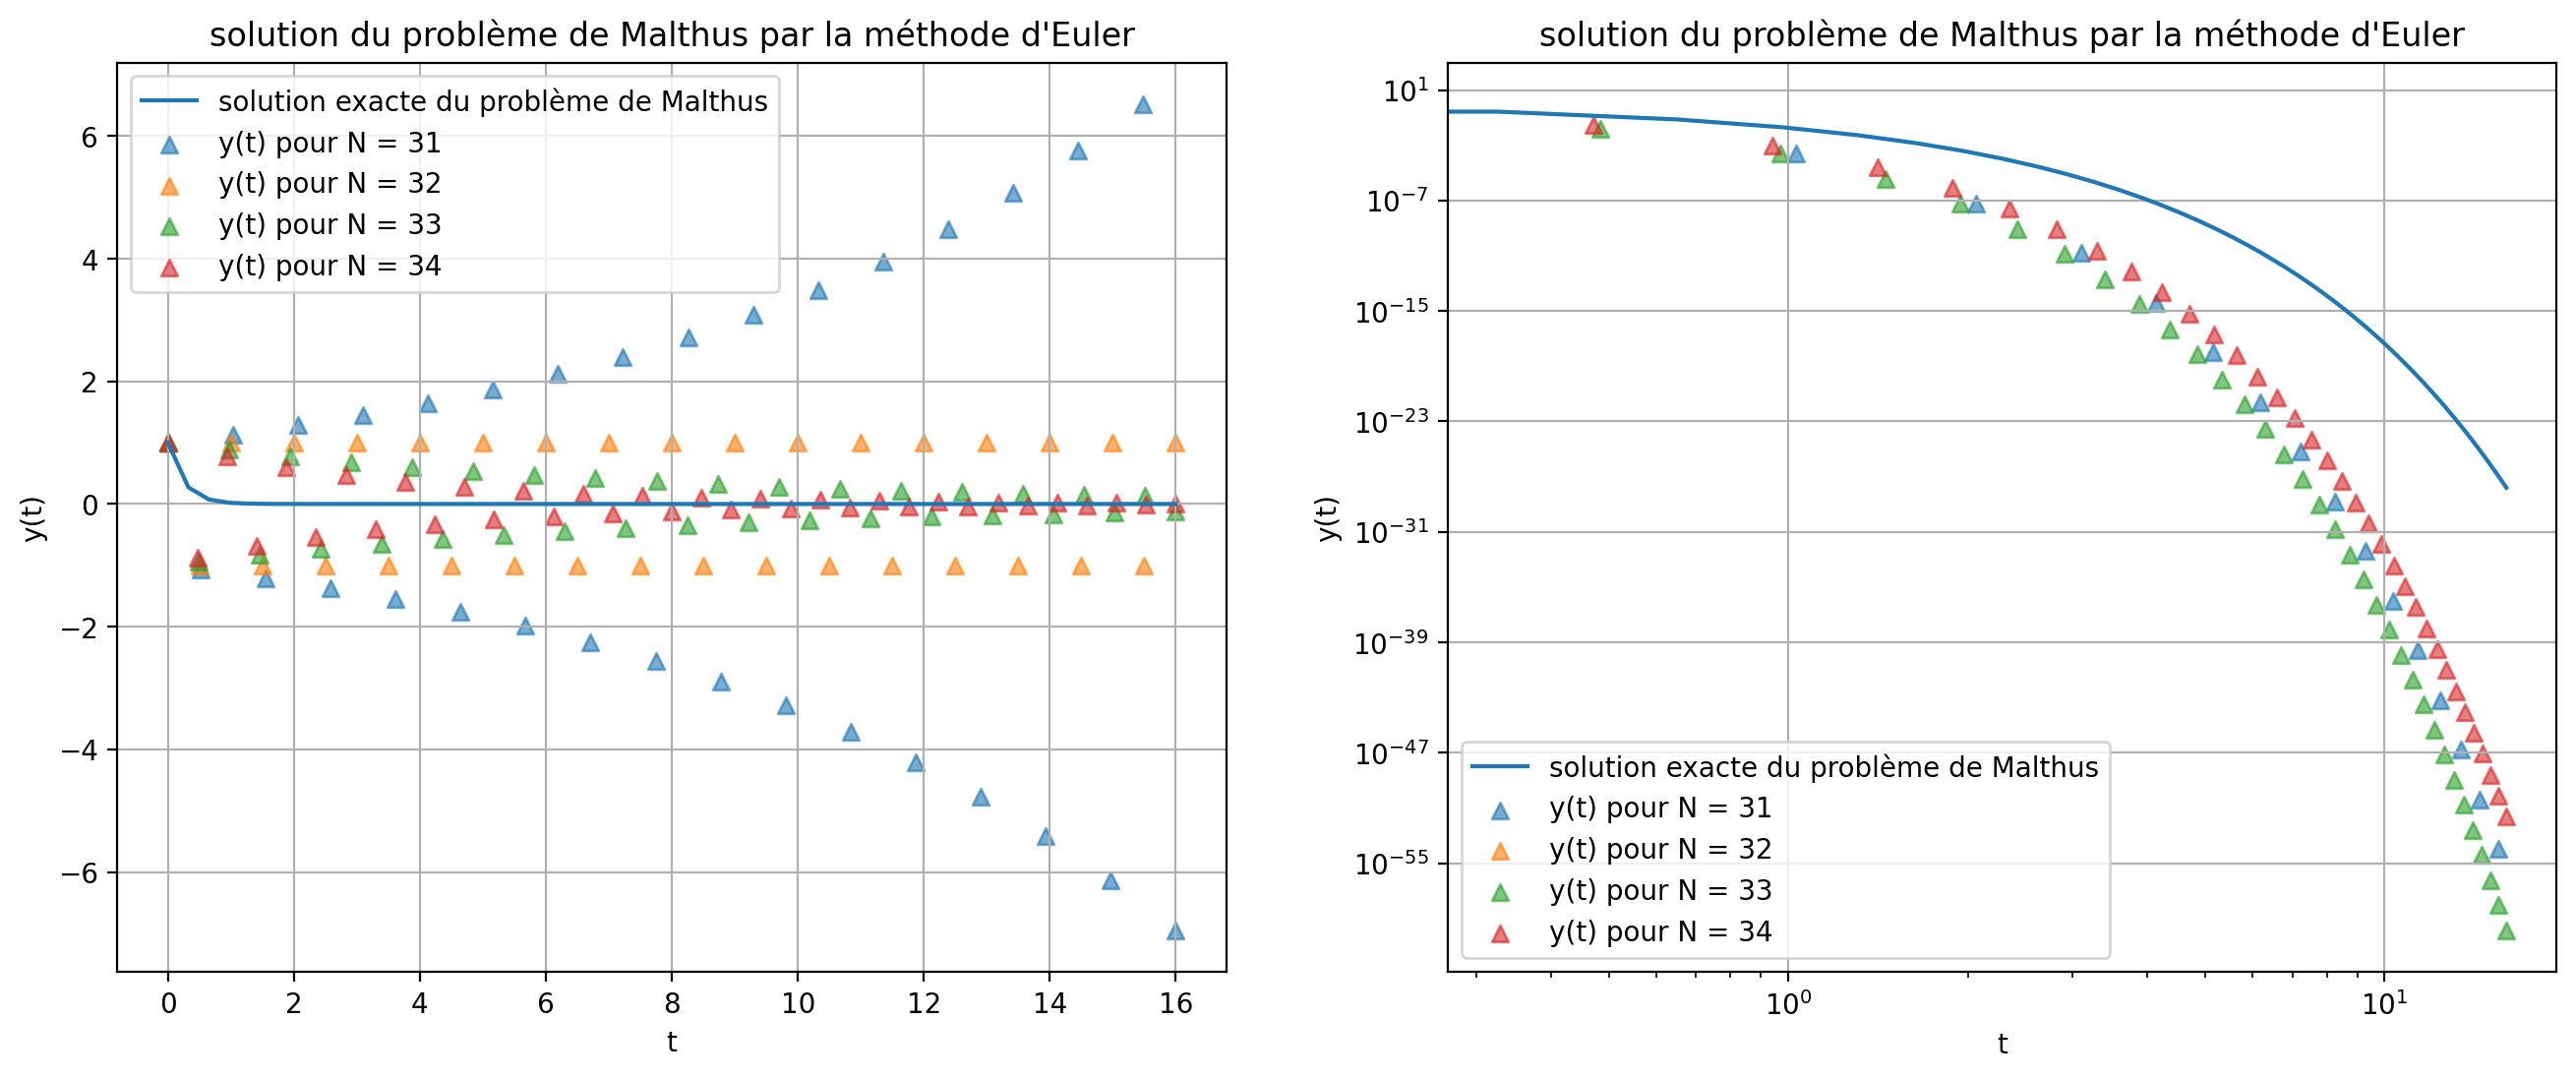

In [25]:
# Paramètres
r = -4
liste_N = [31, 32, 33, 34]
T = 16
y0 = 1
t = np.linspace(0,T)

# Fonction de Malthus
def f_malthus(t, x, r):
    """fonction second membre du problème de Malthus"""
    return r * x

# Solution exacte du problème de Malthus
def sol_exacte_malthus(t, y0, r):
    """solution analytique du problème de Malthus"""
    return y0 * np.exp(r * t)

sol_ex = sol_exacte_malthus(t,y0,r)  # On calcul la solution exacte du problème de Malthus

# On trace les solutions au problème de Malthus avec la méthode d'Euler et de Crank-Nicolson
fig = plt.figure(figsize=(16, 6))

# Schéma d'Euler explicite
axe = fig.add_subplot(1, 2, 1)
axe.grid(True)
axe.set_title('solution du problème de Malthus par la méthode d\'Euler')
axe.set_xlabel('t')
axe.set_ylabel('y(t)')
axe.plot(t,sol_ex, label = 'solution exacte du problème de Malthus')
for N in liste_N:
    """On fait varier N dans [31,32,33,34]"""
    tt,sol_euler = euler(f_malthus, y0,T,N,r)
    axe.scatter(tt,sol_euler, label = f'y(t) pour N = {N}', marker = '^', alpha = 0.6)
    axe.legend()

# Schéma de Crank-Nicolson
axm = fig.add_subplot(1, 2, 2)
axm.grid(True)
axm.set_title('solution du problème de Malthus par la méthode d\'Euler')
axm.set_xlabel('t')
axm.set_ylabel('y(t)')
axm.set_xscale("log")
axm.set_yscale("log")
axm.plot(t,sol_ex, label = 'solution exacte du problème de Malthus')
for N in liste_N:
    """On fait varier N dans [31,32,33,34]"""
    tt,sol_crank = crank_nicolson(y0,T,N,r)
    axm.scatter(tt,sol_crank, label = f'y(t) pour N = {N}',marker = '^', alpha = 0.6)
    axm.legend()
plt.show()

**Réponse à la question 4:**

1) On peut voire que plus N augment plus la solution approchée se rapproche de la solution exacte.

2) Pour moi la méthode de Crank-Nicolson est une méthode cetre plus difficile a mettre en place mais je la trouve aussi plus pressise, c'est pour cela que je la choisirai.

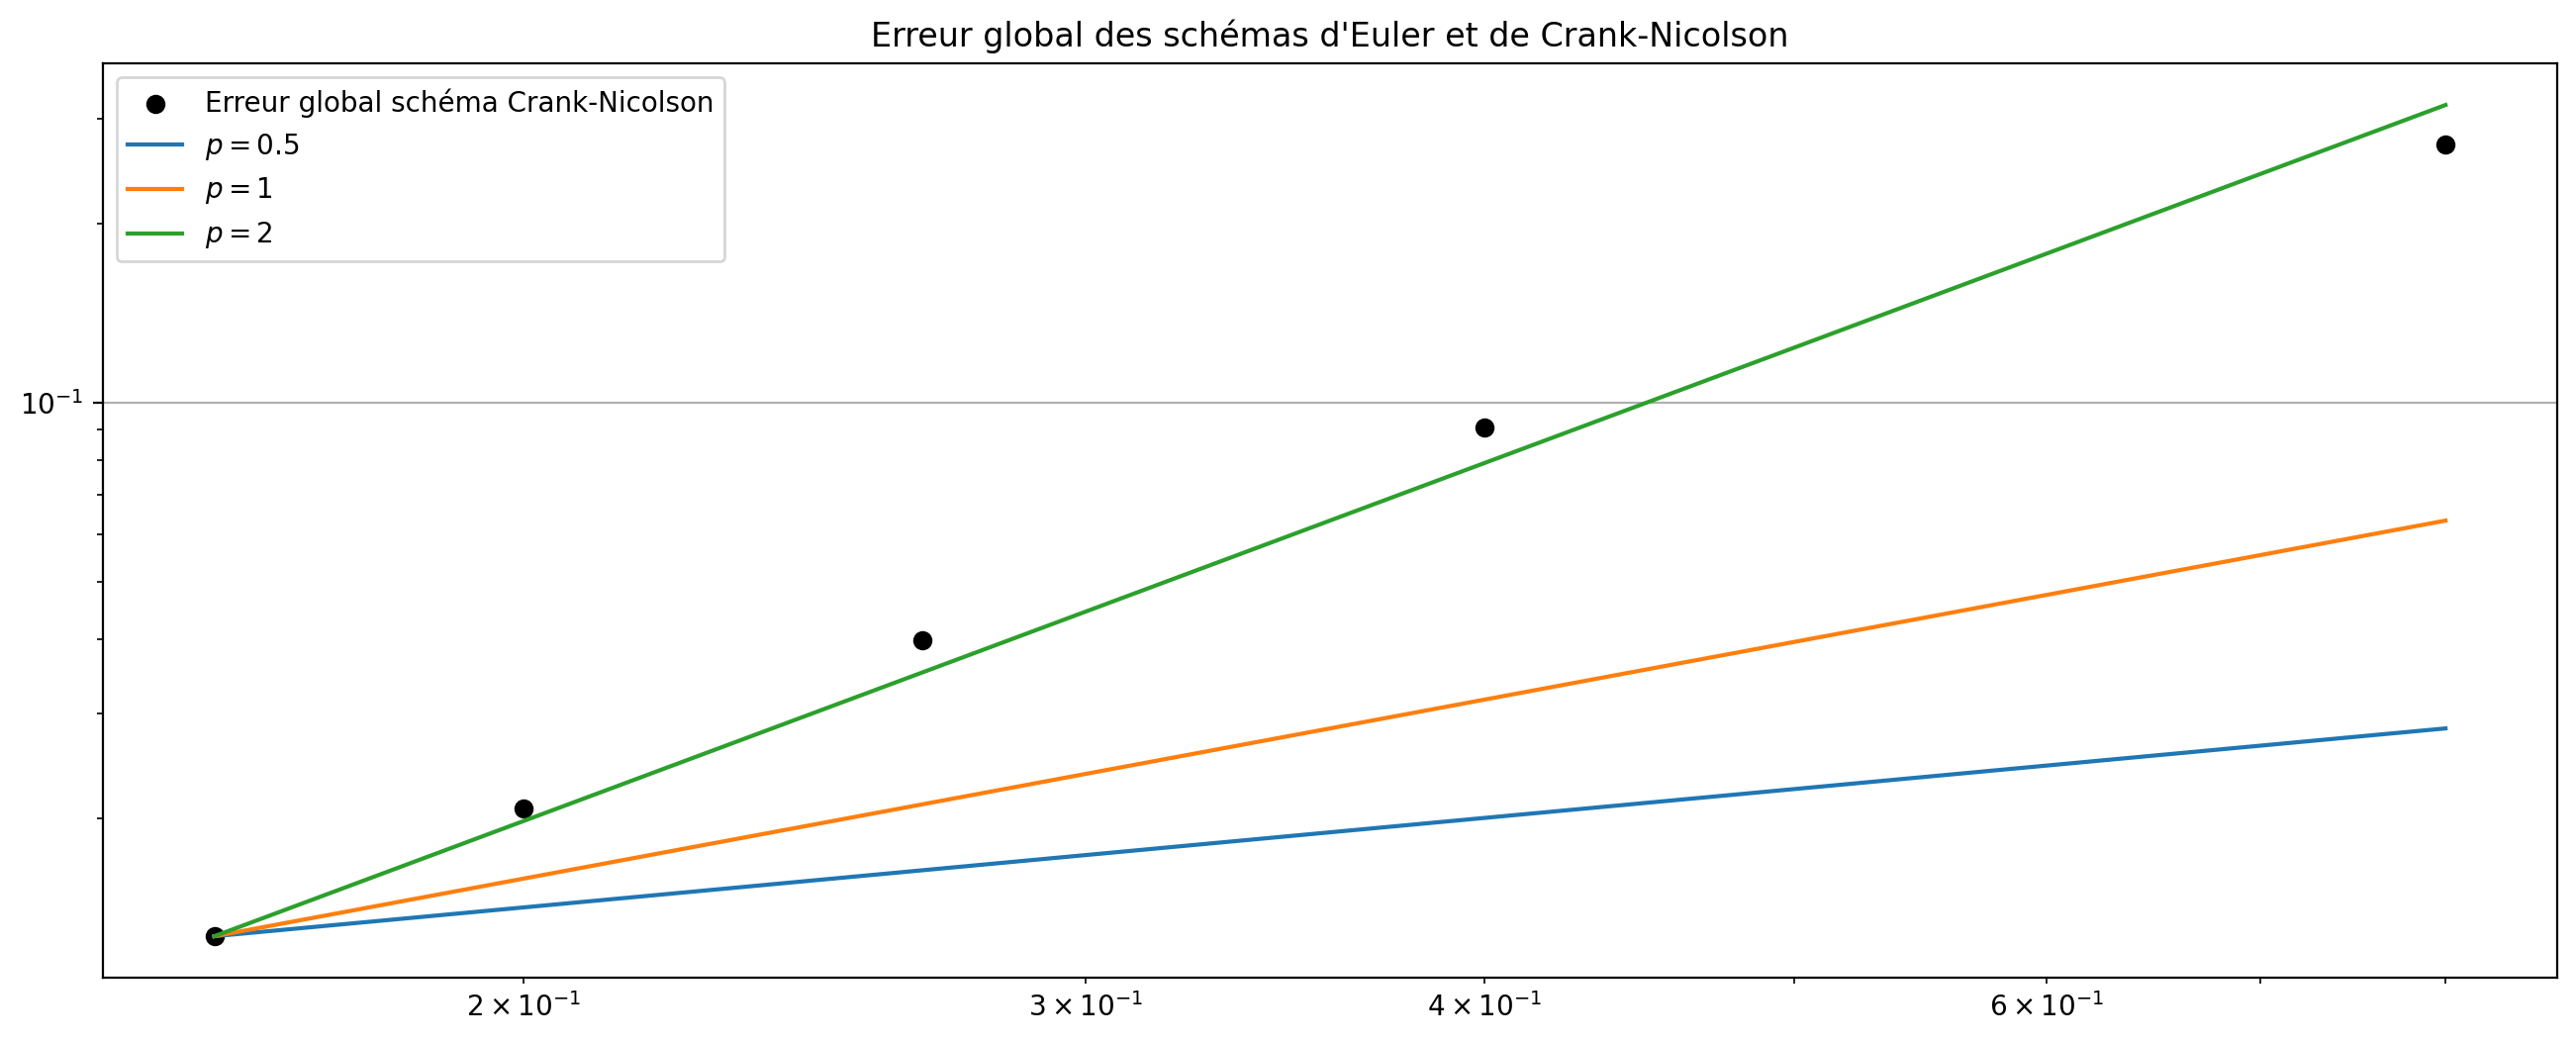

In [49]:
liste_N = np.array([20, 40, 60, 80, 100])
liste_delta = T / liste_N
liste_erreurs_Crank = np.zeros(liste_N.size)

# Calcul des erreurs globals du schéma de Crank-Nicolson pour différentes valeurs de  Δ𝑡 
for k, N in enumerate(liste_N):
    t, sol_appr_crank = crank_nicolson(y0, T, N, r)
    sol_ex = sol_exacte_malthus(t, y0, r)
    erreur_Crank = np.max(np.abs(sol_appr_crank - sol_ex))
    liste_erreurs_Crank[k] = erreur_Crank

# Ordre de covergence pour le schéma de Crank
fig = plt.figure(figsize=(16, 6))
axc = fig.add_subplot(1, 1, 1)
axc.grid(True)
axc.scatter(liste_delta, liste_erreurs_Crank, label = 'Erreur global schéma Crank-Nicolson', color = 'black')
for p in [0.5, 1, 2]:
    """on contrôle l'ordre de convergenge des schémas"""
    C = liste_erreurs_Crank[-1] / (liste_delta[-1] ** p)
    axc.plot(liste_delta, C * liste_delta ** p, label=f"$p={p}$")
axc.set_title("Erreur global des schémas d'Euler et de Crank-Nicolson")
axc.set_xscale("log")
axc.set_yscale("log")
axc.legend()
plt.show()

**Réponse à la question 5:**

D'après l'execice 3 du TP 3, la convergence du schéma d'Euler explicite était de 1. Or ici nous voyons que l'ordre de convergence du schéma de Crank-Nicolson est de 2. Donc nous pouvons dire que l'odre de convergence du schéma de Crank-Nicolson est plus important que celui du schéma d'Euler. 